# Decision trees

The library `scikit-learn` offers the function to work with decision trees. Recall, in each node of the decision tree, excluding the leaves, we have one test that examines the criteria for splitting the tree. Each test result corresponds to one branch of the node leading to the next node. Over the following nodes, the described procedure is applied recursively until some of the stop criteria of model training are met. This can be the maximum depth of the tree, the minimum number of instances in the leaf, the limit fidelity of the hemogonic tree or something else.

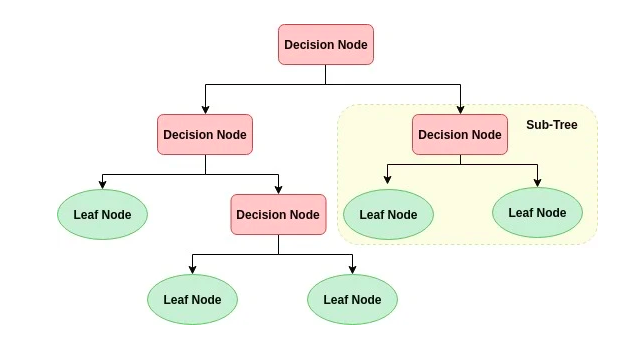

We will apply now decision trees on the classification task. We will use the `Pima Indians Diabetes` dataset, which combines medical data on the basis of which it is necessary to predict whether a patient has diabetes or not. The dataset and supporting information can be found at [Kaggle](https://www.kaggle.com/uciml/pima-indians-diabetes-database).

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn import model_selection
from sklearn import preprocessing
from sklearn import metrics

First let us load the data and let us prepare it for training and testing.

In [4]:
data = pd.read_csv('diabetes.csv')

In [5]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [6]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [7]:
y = data['Outcome']

In [8]:
X = data.drop(columns=['Outcome'], axis=1 )

In [9]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.33, stratify=y, random_state = 7)

In [10]:
scaler = preprocessing.StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

Inside of the package `tree` of the `scikit-learn` library one can find the functions needed for work with decision networks and their visualization.

In [11]:
from sklearn import tree

At the level of each tree, a criterion can be set for deciding on homogeneity (Gini index or entropy), maximum tree depth, maximum number of attributes to be randomly selected, minimum value of branch purity, minimum number of instances per node, ... level of the tree at random, the practice is to set the value of the `random_state` parameter due to repeating of the experiment.

In [12]:
model = tree.DecisionTreeClassifier(criterion='entropy', max_features=0.9, max_depth=3, random_state=7)

Model training and evaluation are conducted by using the `fit` and` predict` functions.

In [13]:
model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, max_features=0.9,
                       random_state=7)

In [14]:
y_predict = model.predict(X_test)

In [15]:
metrics.accuracy_score(y_test, y_predict)

0.7283464566929134

The `plot_tree` function can be used to draw a decision tree. In each node of the tree, the test is stated, then the value of the used measure of homogeneity, the total number of instances that were analyzed, as well as the number of instances by classes.

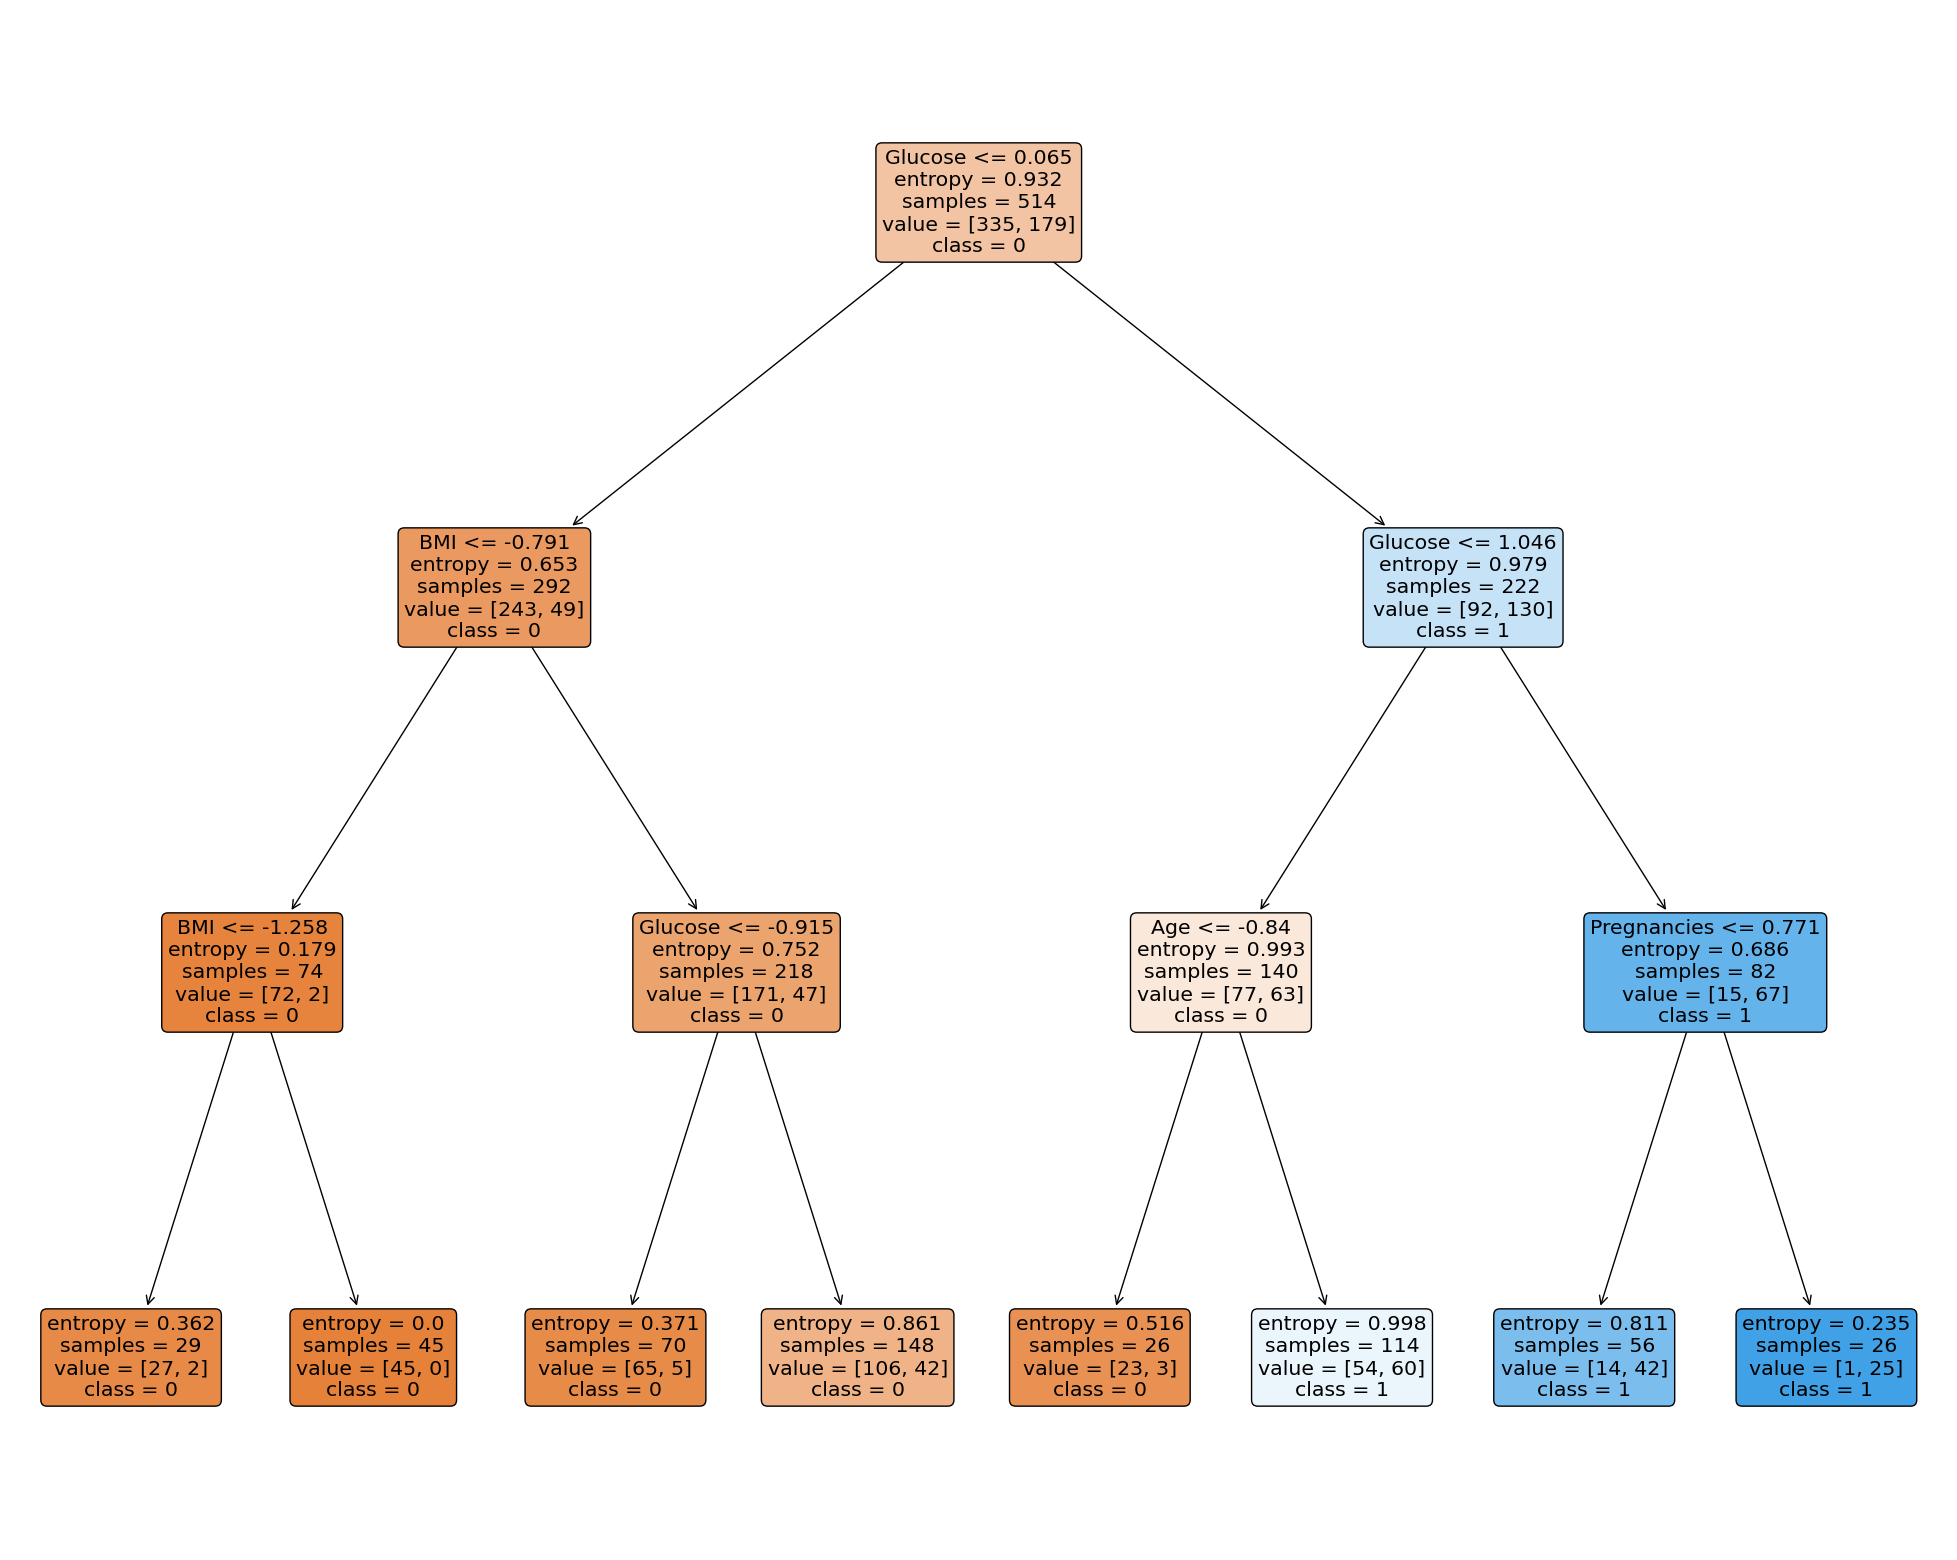

In [16]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(model, feature_names=list(X.columns), class_names=['0','1'], filled=True,  rounded=True)

Another conclusion that can be easily drawn from the decision tree concerns the importance of attributes. Depending on how many times the attribute is skewed in the branching process, its significance can be assessed.

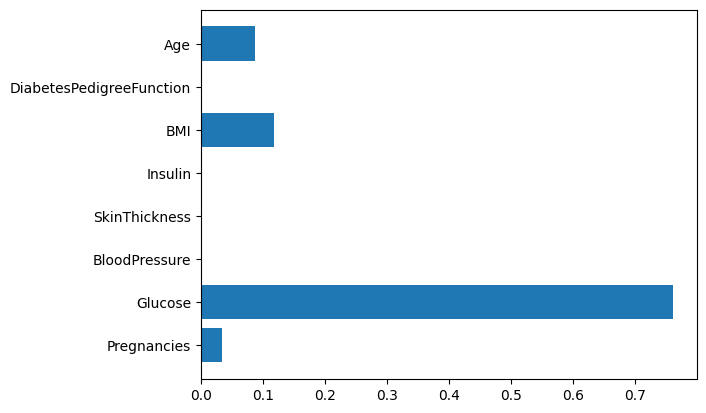

In [17]:
plt.barh(list(X.columns), model.feature_importances_)
plt.show()